### For a given time window say 7 days be able to predict the ‘composite demand’ or total number of ‘piezas’

In [167]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
data_dir = Path('data')
full_df = pd.concat(
    pd.read_parquet(parquet_file)
    for parquet_file in data_dir.glob('*.parquet*')
)
full_df

,BILL_DATE,MATERIAL,SALES_DIST,SOLD_TO,SHIP_TO,PIEZAS
8511,2019-03-03,2641,100482,6001932,7003984,1
8512,2019-03-03,12916,100482,6001932,7003984,1
8513,2019-03-03,2464,100482,6001932,7003984,1
9478,2019-03-03,11074,100482,6001932,7003984,1
9479,2019-03-03,20306,100482,6001932,7003984,1
...,...,...,...,...,...,...
187373097,2021-03-31,2296,104862,6003121,7036861,1
187373098,2021-03-31,3590,104862,6003121,7036861,1
187373099,2021-03-31,8505,104862,6003121,7036861,1
187373100,2021-03-31,16951,104862,6003121,7036861,1


[ 0.00000000e+00  0.00000000e+00 -4.95485744e-72 -1.17791904e-53]


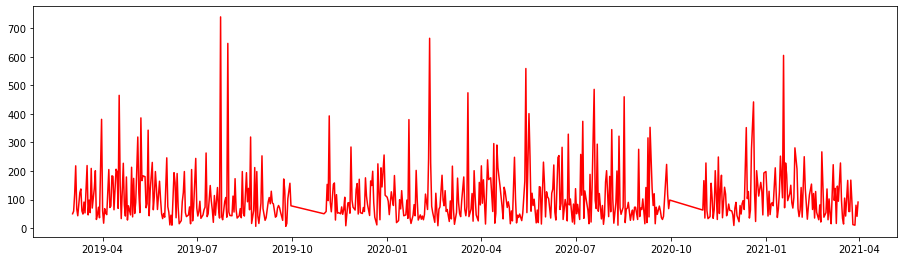

In [ ]:
f = {
        'PIEZAS' : 'sum'
}
g = full_df.groupby(['BILL_DATE'])
v1 = g.agg(f)
s = pd.to_datetime(pd.Series(v1.index.values))
x = np.c_[s]
polynomial_features = PolynomialFeatures(degree=3)
s_poly = polynomial_features.fit_transform(x)
y = v1["PIEZAS"]
fig = plt.figure()
axes=fig.add_axes([0.1,0.1,2,0.8])
axes.plot(x,y,'r')
#plt.scatter(x,y)
model = LinearRegression()
model.fit(s_poly, y)
y_poly_pred = model.predict(s_poly)
print(lm.coef_)
fig = plt.figure()
axes=fig.add_axes([0.1,0.1,2,0.8])
axes.scatter(x, y, s=10)
axes.plot(x, y_poly_pred, color='m')

### Split data


In [160]:
X_train, X_test, y_train, y_test = train_test_split(s_poly,y,test_size=0.4)

### Train model

In [161]:
lm = LinearRegression()

In [162]:
lm.fit(X_train,y_train)

LinearRegression()

### Evaluate model

In [163]:
print(lm.coef_)

[ 0.00000000e+00  0.00000000e+00 -4.95485744e-72 -1.17791904e-53]


In [164]:
coeff_df = pd.DataFrame(lm.coef_,['PIEZAS','PIEZAS','PIEZAS','PIEZAS'],columns=['Coefficient'])
coeff_df

,Coefficient
PIEZAS,0.000000e+00
PIEZAS,0.000000e+00
PIEZAS,-4.954857e-72
PIEZAS,-1.177919e-53


### Predictions from our Model 

In [165]:
predictions = lm.predict(X_test)

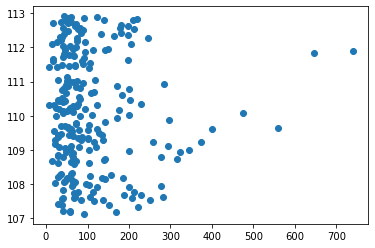

In [166]:
plt.scatter(y_test,predictions)

<AxesSubplot:>

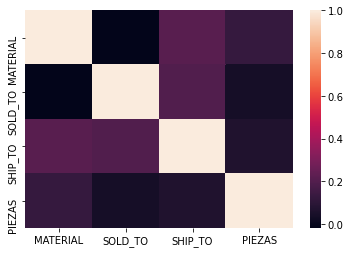

In [98]:
sns.heatmap(full_df.corr())

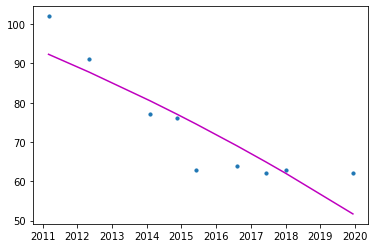

In [127]:
y = np.array([102., 91., 77., 76., 63., 64., 62., 63., 62.])
s = pd.to_datetime(pd.Series(['3/3/2011', '5/5/2012', '2/2/2014', '11/11/2014',
                              '6/6/2015', '8/8/2016', '6/6/2017', '1/1/2018',
                              '12/12/2019']))

x = np.c_[s]
polynomial_features = PolynomialFeatures(degree=3)
s_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(s_poly, y)
y_poly_pred = model.predict(s_poly)

plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred, color='m')
plt.show()

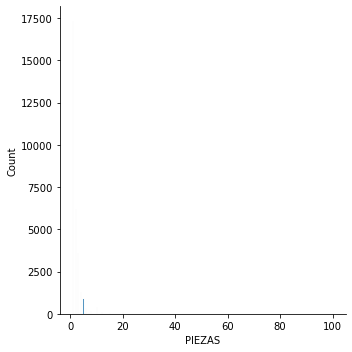

In [45]:
sns.displot(full_df['PIEZAS'])

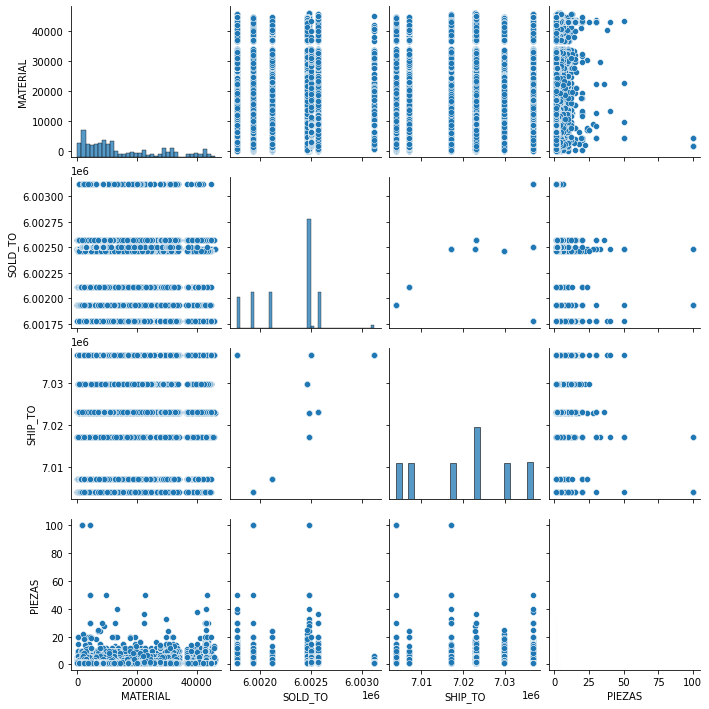

In [8]:
sns.pairplot(full_df)

In [33]:
#X_train,X_test,y_train,y_test = train_test_split(X,y)
#print(full_df.columns)
print(full_df.columns.values.tolist())
X = full_df[['BILL_DATE','MATERIAL','SALES_DIST','SOLD_TO','SHIP_TO','PIEZAS']]
y = full_df['']

['BILL_DATE', 'MATERIAL', 'SALES_DIST', 'SOLD_TO', 'SHIP_TO', 'PIEZAS']
